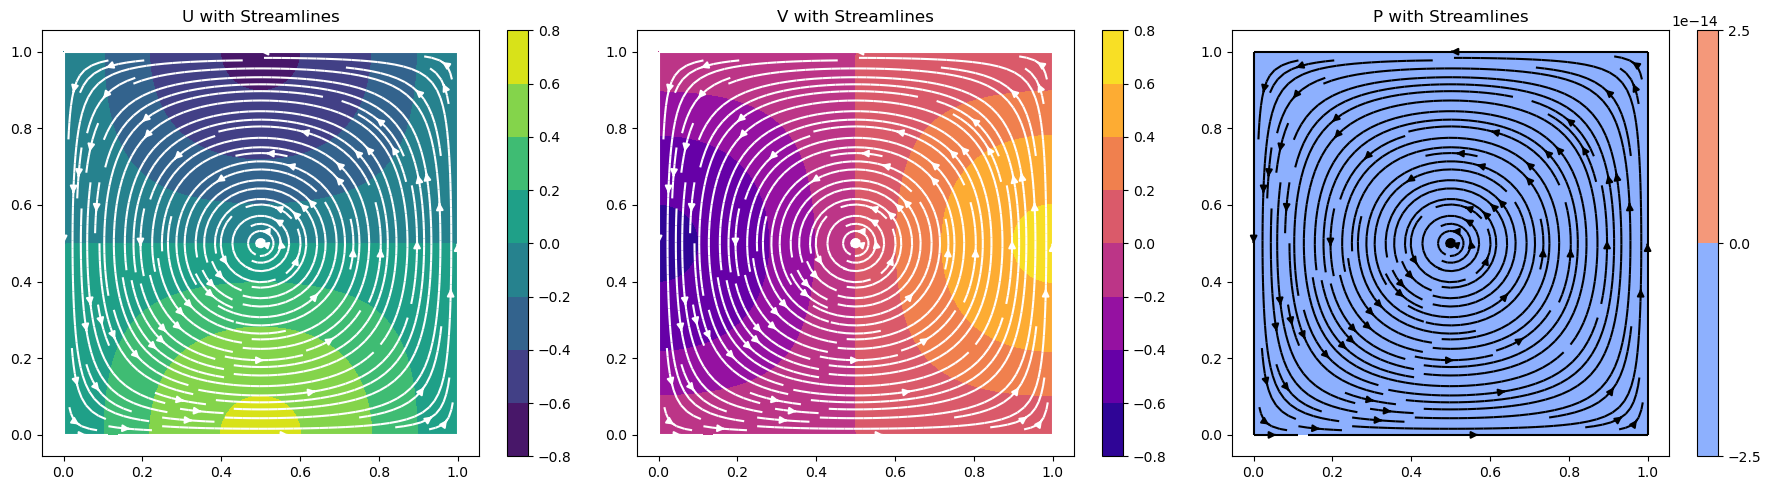

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load data
data = np.loadtxt("bbfsol.dat", skiprows=1)
X, Y, U, V, P = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]

# Create a structured grid for plotting
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
X_grid, Y_grid = np.meshgrid(xi, yi)

# Interpolate U, V, P onto the structured grid
U_grid = griddata((X, Y), U, (X_grid, Y_grid), method='linear')
V_grid = griddata((X, Y), V, (X_grid, Y_grid), method='linear')
P_grid = griddata((X, Y), P, (X_grid, Y_grid), method='linear')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# U plot
c1 = axes[0].contourf(X_grid, Y_grid, U_grid, cmap='viridis')
axes[0].streamplot(X_grid, Y_grid, U_grid, V_grid, color='white', density=1.5)
axes[0].set_title('U with Streamlines')
plt.colorbar(c1, ax=axes[0])

# V plot
c2 = axes[1].contourf(X_grid, Y_grid, V_grid, cmap='plasma')
axes[1].streamplot(X_grid, Y_grid, U_grid, V_grid, color='white', density=1.5)
axes[1].set_title('V with Streamlines')
plt.colorbar(c2, ax=axes[1])

# P plot
c3 = axes[2].contourf(X_grid, Y_grid, P_grid, cmap='coolwarm')
axes[2].streamplot(X_grid, Y_grid, U_grid, V_grid, color='black', density=1.5)
axes[2].set_title('P with Streamlines')
plt.colorbar(c3, ax=axes[2])

plt.tight_layout()
plt.show()


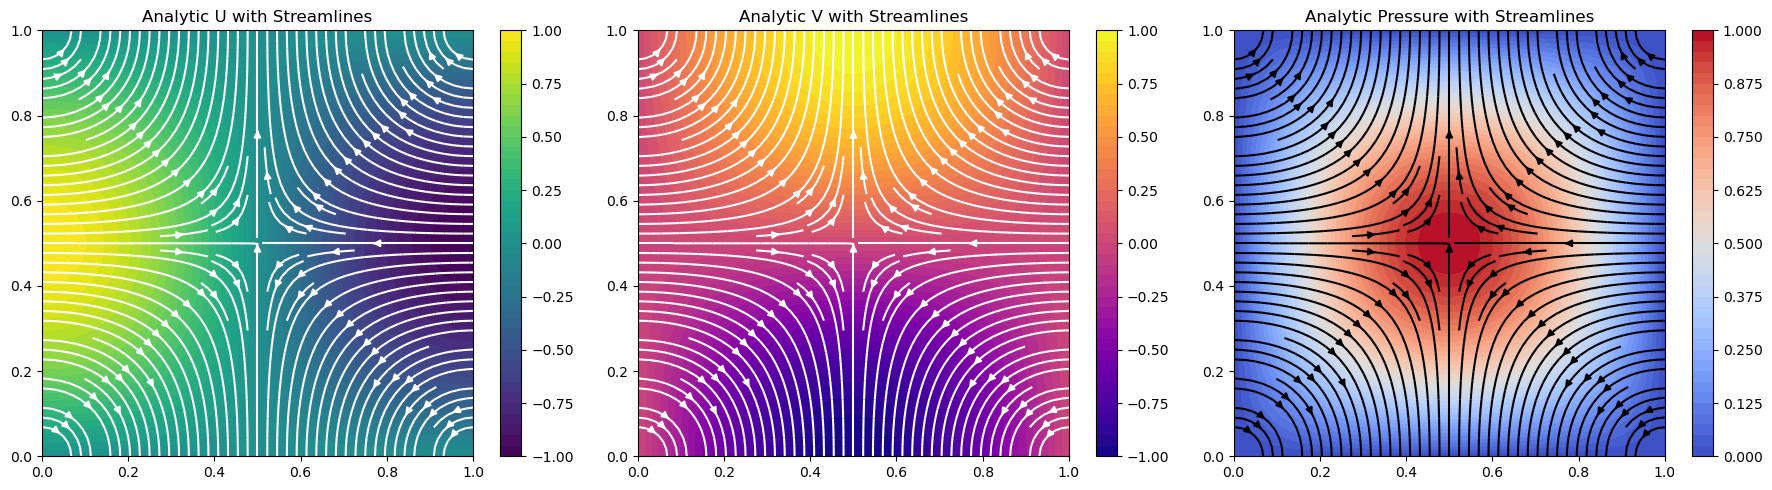

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Analytic manufactured solution (MMS)
# Change these formulas if you prefer a different MMS
# -------------------------------------------------------------------
def u_exact(x, y):
    return np.cos(np.pi * x) * np.sin(np.pi * y)

def v_exact(x, y):
    return -np.sin(np.pi * x) * np.cos(np.pi * y)

def p_exact(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# -------------------------------------------------------------------
# Grid for analytic evaluation
# -------------------------------------------------------------------
nx, ny = 200, 200
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

U = u_exact(X, Y)
V = v_exact(X, Y)
P = p_exact(X, Y)

# -------------------------------------------------------------------
# Plotting
# -------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- U ---
c1 = axes[0].contourf(X, Y, U, 40, cmap='viridis')
axes[0].streamplot(X, Y, U, V, color='white', density=1.5)
axes[0].set_title("Analytic U with Streamlines")
plt.colorbar(c1, ax=axes[0])

# --- V ---
c2 = axes[1].contourf(X, Y, V, 40, cmap='plasma')
axes[1].streamplot(X, Y, U, V, color='white', density=1.5)
axes[1].set_title("Analytic V with Streamlines")
plt.colorbar(c2, ax=axes[1])

# --- P ---
c3 = axes[2].contourf(X, Y, P, 40, cmap='coolwarm')
axes[2].streamplot(X, Y, U, V, color='black', density=1.5)
axes[2].set_title("Analytic Pressure with Streamlines")
plt.colorbar(c3, ax=axes[2])

plt.tight_layout()
plt.show()
